# Extracting Contact Recombination from FFT-filtered Photoluminescence Imaging

## Photoluminescence Imaging (PLI)

Photoluminescence imaging (PLI) is a powerful tool for evaluating carrier recombination processes in photovoltaic materials. In this study, PLI was used to measure luminescence intensity patterns, which correlate with recombination at the metal-silicon interface. Samples with a tunneling oxide passivated contact (TOPCon) structure and industrial screen-printed metallisation were used.

## Fourier Transform Filtering

The primary analytical method involves converting spatial photoluminescence data into the frequency domain using the Fast Fourier Transform (FFT).

### Key Steps:
1. **Transform to Frequency Domain**:
   - PL line profiles are converted into the frequency domain using FFT:
     $$
     X_k = \sum_{n=0}^{N-1} x_n e^{-i 2\pi k n / N}
     $$
     where:
     - $X_k$: Frequency domain representation.
     - $x_n$: Spatial domain data.
     - $N$: Total number of data points.

2. **Bandpass Filtering**:
   - A selective filter isolates the fundamental spatial frequency of the metallisation pattern.
   - Noise and higher harmonics are suppressed by applying a rectangular window:
  
     $$
     \text{Filtered sim\_PL\_signal} = \text{FFT}^{-1}(X_k \cdot W_k)
     $$     
  
     where $W_k$ is the filter window.

3. **Reconstruction in Spatial Domain**:
   - The inverse FFT reconstructs the filtered sim_PL_signal back into the spatial domain:
     $$
     x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k e^{i 2\pi k n / N}
     $$

4. **Metal Contrast Calculation**:
   - Metal contrast $C_{\text{metal}}$ is defined as the average amplitude of oscillations:
     $$
     C_{\text{metal}} = \frac{A_{\text{ave}}}{S_{\text{ave}}} \times 100\%
     $$

     where:
     - $A_{\text{ave}}$: Average oscillation amplitude.
     - $S_{\text{ave}}$: Average sim_PL_signal level.



# Code execution
## Import required libraries:


In [45]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import find_peaks, peak_prominences
import h5py
from scipy.interpolate import interp1d


## Load the TIFF image

In [46]:
image_path = './data_example/A150with_1__averaged.tif'
img = Image.open(image_path)
image_array = np.array(img)
image_size = image_array.shape

## Import the function 'pl_line_contrast' to conduct the calculations explained above

In [47]:
# pl_line_contrast Function Definition

from J0FFT_functions import pl_line_contrast

# this function exectues the FFT analysis explained above

## Example: process one horizontonal line and display the FFT contrast value

The number of rows (height) in the image is: 1472


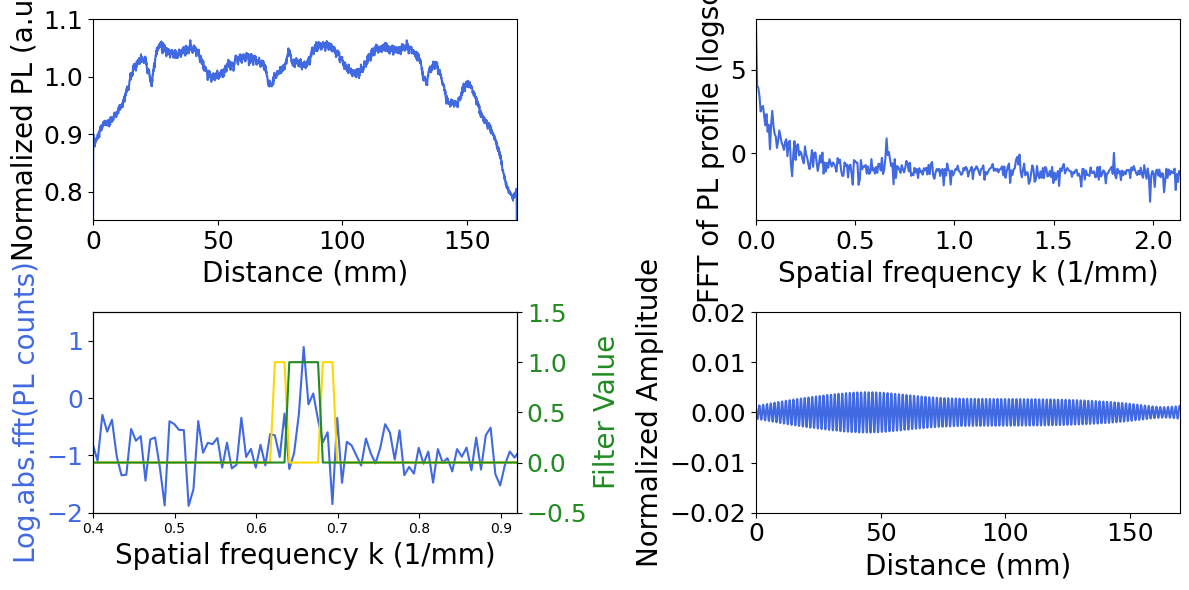

FFT contrast for line 200: 0.52%


In [48]:
# Process a single line of the image (line 200 for example), can be any line from 0 to (number of rows - 1) in the PL image.

line_index = 200

# Get the number of rows in the image (height)
num_rows = image_array.shape[0]  # First dimension corresponds to rows (height)

# Print the number of rows
print(f"The number of rows (height) in the image is: {num_rows}")

image_width_mm = 170.13  # given in mm
center_frequency = 0.658  # Band center (supposed to be 1/metal spacing in mm)

total_contrast = np.zeros(image_size[0])
total_contrast[line_index] = pl_line_contrast(image_array[line_index], 1, image_width_mm, center_frequency) # plot_option=1

# Display contrast result for the processed line
print(f"FFT contrast for line {line_index}: {total_contrast[line_index]:.2f}%")

## Obtain the averaged FFT contrast of the entire image

In [49]:
# Create an empty array to store contrast values for each line
total_contrast = np.zeros(image_size[0])

image_width_mm = 170.13  # given in mm
center_frequency = 0.658  # Band center (supposed to be 1/metal spacing in mm)

# Process each line in the image
for i in range(image_size[0]):
    total_contrast[i] = pl_line_contrast(image_array[i],0, image_width_mm,center_frequency) # plot_option=0

# Calculate and print the mean contrast for the current image
mean_contrast = np.mean(total_contrast)
file_name = os.path.basename(img.filename)
print(f"FFT contrast for image {file_name}: {mean_contrast:.2f}%")

FFT contrast for image A150with_1__averaged.tif: 0.51%


### it is also possible to process all images in a selected folder

In [50]:
# Initialize folder path and image processing loop
folder_path = './data_example'
image_suffix = '__averaged.tif'

for file_name in os.listdir(folder_path):
    # Construct image path
    image_path = os.path.join(folder_path, file_name)

    # Open image and convert to numpy array
    img = Image.open(image_path)
    image_array = np.array(img)
    image_size = image_array.shape

    # Create an empty array to store contrast values for each line
    total_contrast = np.zeros(image_size[0])

    # Process each line in the image
    for i in range(image_size[0]):
        total_contrast[i] = pl_line_contrast(image_array[i],0,image_width_mm,center_frequency)

    # Calculate and print the mean contrast for the current image
    mean_contrast = np.mean(total_contrast)
    print(f"FFT contrast for image {file_name}: {mean_contrast:.2f}%")


FFT contrast for image A150with_1__averaged.tif: 0.51%
FFT contrast for image A150with_4__averaged.tif: 0.39%
FFT contrast for image A150with_8__averaged.tif: 0.57%



## Numerical Simulations of Carrier Density and Photoluminiscent Yield
Numerical device simulations link the observed metal contrast to the metal recombination parameter $J_0,c$.

### Simulation Tools:
1. **PC3D**:
   - Solves 2D carrier transport equations.
   - Models carrier density distributions and luminescence profiles.

2. **Quokka3**:
   - Simulates spatial PL emission patterns with optical filtering effects.
   - Incorporates material-specific properties for higher accuracy.

### Key Simulation Outputs:
- **Carrier Profiles**:
  - 2D maps of excess carrier densities as a cuntion of depth and lateral position in the cell, under steady-state illumination.
- **PL Profiles**:
  - Simulated luminescence intensity as a function of lateral position, for different metal contact recombination $J_0,c$.

### Relationship Between $J_{0,c}$ and Metal Contrast:
A linear correlation was established between simulated PL metal contrast and $J_0,c$ values:
$$
C_{\text{metal}} \propto (J_{0,c} - J_{0,\text{TOPCon}})
$$
where $J_0,\text{TOPCon}$ is the baseline recombination at non-contacted surfaces.

## J0cont analysis of a PC3D Simulation

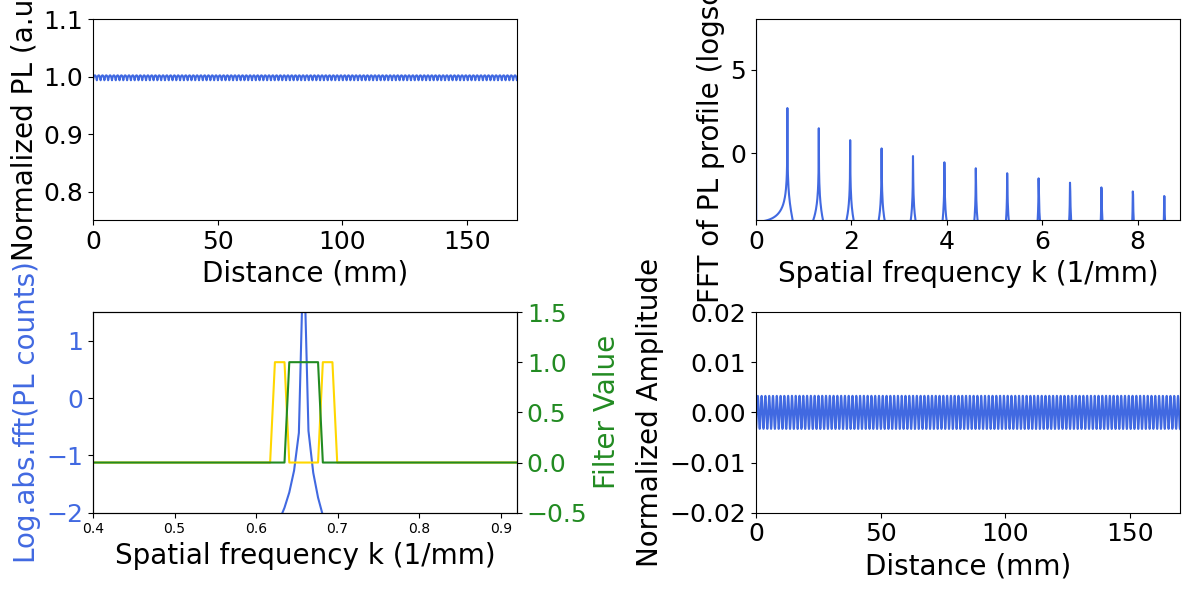

FFT contrast for line ./PC3D_J0FFT_topcon_v1.xlsm: 0.66%


In [51]:
# this code requires a PC3D.xlsm simulation file 
# with the calculated PL emission profile in the Data sheet

pc3d_file = './PC3D_J0FFT_topcon_v1.xlsm'

# Read data from Excel file
df = pd.read_excel(pc3d_file, sheet_name='Data', header=None,  usecols="BE:CS", skiprows=1, nrows=43)

#extract the simulated signal from the panda data_frame
sim_PL_signal=df.iloc[42].to_numpy()

# Define spatial parameters (set inside the PC3D file)
delta_x = 0.01875  # mm
image_width_mm = 170.13  # Total length in mm of the desired sim_PL_signal length
center_frequency = 0.658  # Band center (supposed to be 1/metal spacing in mm)


spatial_axis = np.arange(0, image_width_mm, delta_x)

# Ensure the spatial axis length matches the sim_PL_signal length
if len(spatial_axis) % 2 == 0:
    spatial_axis = np.append(spatial_axis, spatial_axis[-1] + delta_x)
sim_PL_signal_length = len(spatial_axis)

# Compose a symmetric sim_PL_signal (repeat + flip)
symmetric_sim_PL_signal = np.concatenate([sim_PL_signal[:], np.flip(sim_PL_signal[1:])])
repeat_count = np.ceil(sim_PL_signal_length / len(symmetric_sim_PL_signal)).astype(int)
repeated_sim_PL_signal = np.tile(symmetric_sim_PL_signal, repeat_count)[:sim_PL_signal_length]

# feed the simulated signal into the same algorithm used to analyse empirical PL images 
PC3D_contrast=pl_line_contrast(repeated_sim_PL_signal, 1, image_width_mm,center_frequency)

# Display contrast result for the processed line
print(f"FFT contrast for line {pc3d_file}: {PC3D_contrast:.2f}%")

## Quokka3 Simulations

Prior to executing the code below, you need to have set up and ran a Quokka3.m simulation.

Code works both with free and paid versions of Quokka3.The full version includes proper luminescence modeling, so the luminescence profile can be read directly. For the free version it is calculated from the 2D carrier profile (actually 2D quasi Fermi-potential split) with a simple model equivalent to that explained in the paper for (PC3D).

The results file will be used here to produce an FFT analysis.


In [52]:
# first import the required function
from   J0FFT_functions import get_Q3_PL_signal

# make sure to select the right file with your solutions
Q3_resultsfile = './Quokka3_J0FFT_TOPCon_FREE_results.h5'

Nx = 100 # number of equally spaced X-values along the solution domain width, on which the non-equidistant solution is interpolated

# solutions are stored in the following two variables
lumi_profiles, J0cont = get_Q3_PL_signal(Q3_resultsfile, Nx)


 Now we can run the PL profile generated in Quokka into the same analysis algorithm

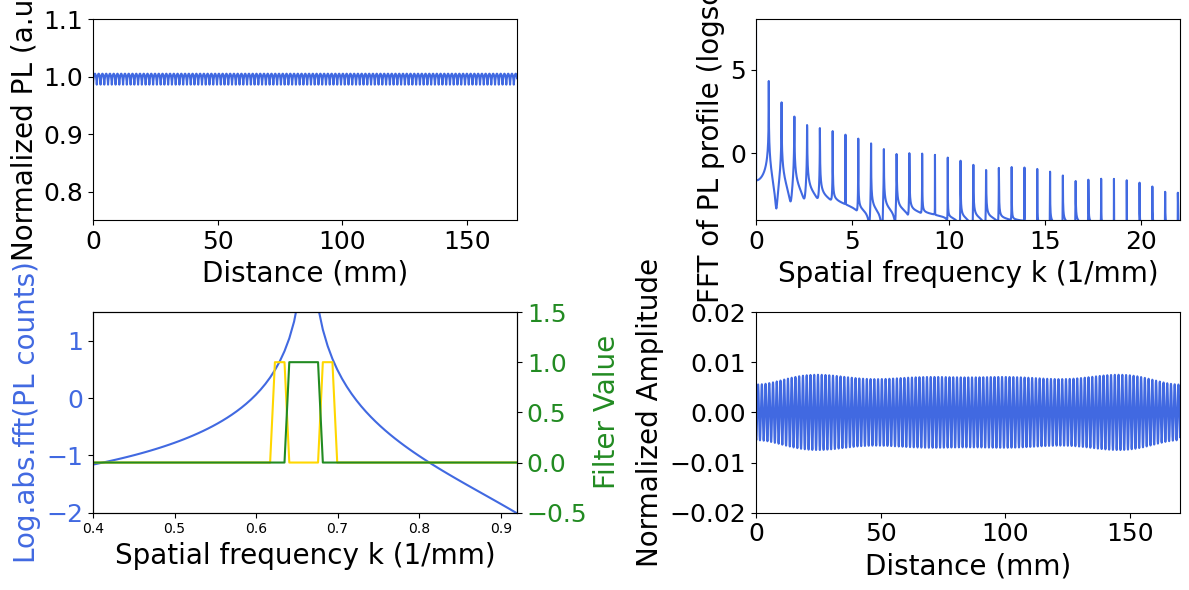

FFT contrast for line ./PC3D_J0FFT_topcon_v1.xlsm: 1.37%


In [53]:
#select one of the solutions, for example that in row [1]
select_row=1
x_coordinate = lumi_profiles[select_row]['X']
PL_intensity = lumi_profiles[select_row]['Y']

#extract the simulated signal from the panda data_frame
sim_PL_signal=PL_intensity[:, 0]

# Define spatial parameters (obtained Quokka simulation)
delta_x = (x_coordinate[1]-x_coordinate[0])*1e1  # mm
image_width_mm = 170.13  # Total length in mm of the desired sim_PL_signal length
center_frequency = 0.658  # Band center (supposed to be 1/metal spacing in mm)


spatial_axis = np.arange(0, image_width_mm, delta_x[0])

# Ensure the spatial axis length matches the sim_PL_signal length
if len(spatial_axis) % 2 == 0:
    spatial_axis = np.append(spatial_axis, spatial_axis[-1] + delta_x)
sim_PL_signal_length = len(spatial_axis)

# Compose a symmetric sim_PL_signal (repeat + flip)
symmetric_sim_PL_signal = np.concatenate([sim_PL_signal[:], np.flip(sim_PL_signal[1:])])
repeat_count = np.ceil(sim_PL_signal_length / len(symmetric_sim_PL_signal)).astype(int)
repeated_sim_PL_signal = np.tile(symmetric_sim_PL_signal, repeat_count)[:sim_PL_signal_length]
# feed the simulated signal into the same algorithm used to analyse empirical PL images 
PC3D_contrast=pl_line_contrast(repeated_sim_PL_signal, 1, image_width_mm,center_frequency)

# Display contrast result for the processed line
print(f"FFT contrast for line {pc3d_file}: {PC3D_contrast:.2f}%")
